## Loading Library

In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [86]:
#1# load the data set ans show the first five transaction
url = "https://raw.githubusercontent.com/tsalisacamila/Data-Mining/refs/heads/main/bread%20basket.csv"
df = pd.read_csv(url)
df.head()


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [87]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


#3 check missing values
df.isnull().sum()

4. The overview reveals a _checking for missing values and summarizing the basic statistics of the dataset_. (fill that blank on the section below)

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

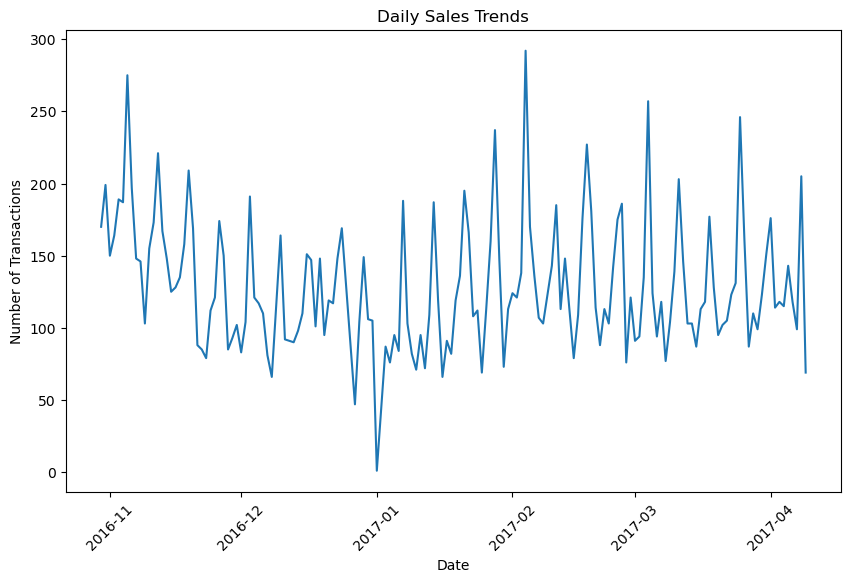

In [ ]:
# 5
df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")
df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek

daily_transactions = df.groupby('date').size()

plt.figure(figsize=(10,6))
daily_transactions.plot(kind='line', title='Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()



Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [ ]:
# 6
df['date_time'] = pd.to_datetime(df['date_time'])
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()

df[['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend', 'day', 'month', 'year', 'time', 'hour', 'day_name']].sample(5)

,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
18849,8924,Mineral water,2017-03-27 14:41:00,afternoon,weekday,27,3,2017,14:41:00,14,Monday
19117,9055,Farm House,2017-03-30 11:11:00,morning,weekday,30,3,2017,11:11:00,11,Thursday
12598,6208,Coffee,2017-02-08 10:21:00,morning,weekday,8,2,2017,10:21:00,10,Wednesday
2542,1232,Bread,2016-11-13 11:49:00,morning,weekend,13,11,2016,11:49:00,11,Sunday
38,15,Scandinavian,2016-10-30 10:34:00,morning,weekend,30,10,2016,10:34:00,10,Sunday



Alright, now I can easily create a visualization of monthly sales.

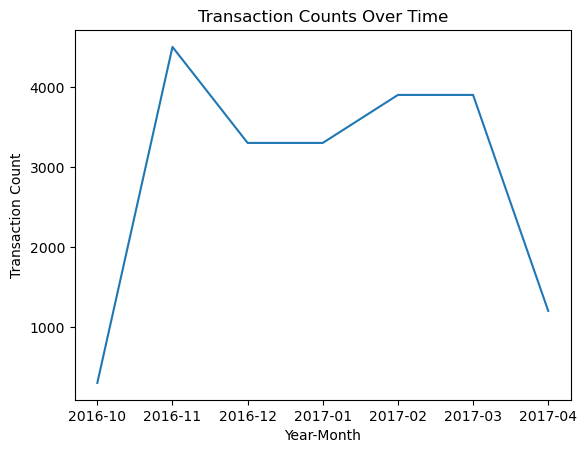

In [91]:
# 7
import matplotlib.pyplot as plt

dates = ['2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04']
transaction_counts = [300, 4500, 3300, 3300, 3900, 3900, 1200]

plt.plot(dates, transaction_counts)
plt.title('Transaction Counts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.show()



8. Now, the visualization above provides better insights: _into the overall trend of transaction counts over time, with a clear peak in November 2016 and a decline towards the end of 2017._. 

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [ ]:
#9
df['day_name'] = df['date_time'].dt.day_name()

df['weekday_weekend'] = df['day_name'].apply(lambda x: 'weekend' if x in ['Saturday', 'Sunday'] else 'weekday')

weekday_names = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()
print("Unique weekday names:", weekday_names)

weekend_names = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()
print("Unique weekend names:",weekend_names)



Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [95]:
#10
transaction = df.groupby(['month', 'day_name'])['Transaction'].count().reset_index()
transaction = transaction.pivot(index='month', columns='day_name', values='Transaction').fillna(0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction = transaction[days_order]
transaction = transaction.astype(int)

display(transaction)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _The patterns of transactions across different days of the week can be analyzed for each month, helping to identify peak days and trends.__


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

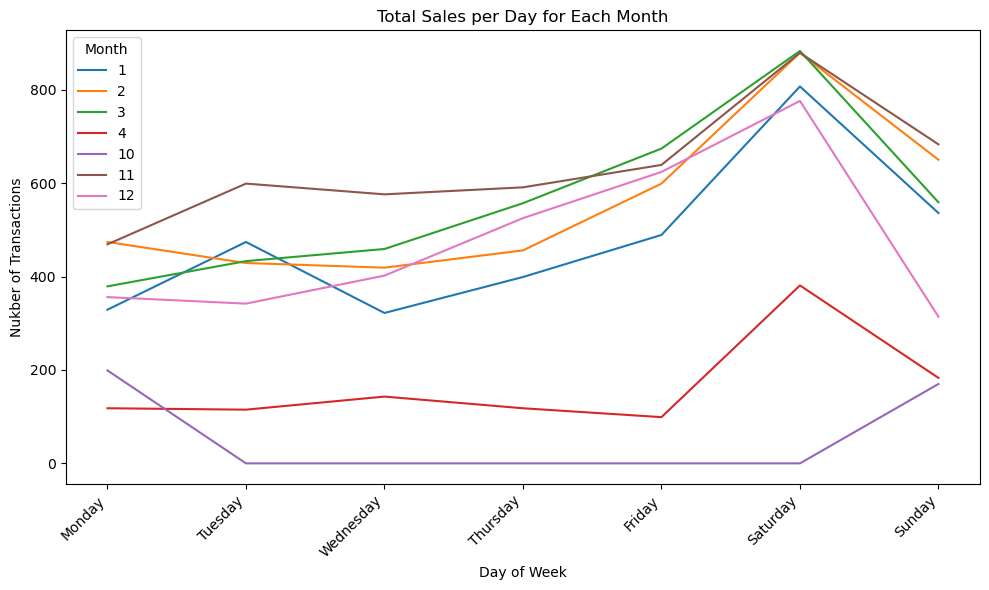

In [98]:
# 12
transaction_table = df.groupby(['month', 'day_name'])['Transaction'].count().reset_index()
transaction_table = transaction_table.pivot(index='month', columns='day_name', values='Transaction').fillna(0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_table = transaction_table[days_order]
transaction_table = transaction_table.astype(int)

transaction_table = transaction_table.T  
transaction_table.plot(kind='line', figsize=(10, 6)) 
plt.title('Total Sales per Day for Each Month')
plt.xlabel('Day of Week')  
plt.ylabel('Nukber of Transactions')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Month')  
plt.tight_layout()
plt.show()


13. Wow, after visualizing it like this, I can gain insights into the sales trends that _reveal how sales fluctuate throughout the week and across different months, allowing for a better understanding of customer behavior and business cycles._.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [99]:
# 14
days_name = df['period_day'].unique()
print(days_name)

['morning' 'afternoon' 'evening' 'night']


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [102]:
# 15
hour_ranges = df.groupby('period_day')['hour'].unique()
print(hour_ranges)

period_day
afternoon    [12, 13, 14, 15, 16]
evening          [17, 18, 19, 20]
morning      [9, 10, 11, 8, 7, 1]
night                [21, 23, 22]
Name: hour, dtype: object


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?
1 AM should logically be categorized as part of the night or early morning hours, not the morning period, this could indicate an issue with how the hours are recorded or a misclassification in the data, it's possible that the hour 1 might be incorrectly recorded in your data, or there could be a mistake in how the time slots were categorized in your original dataset.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

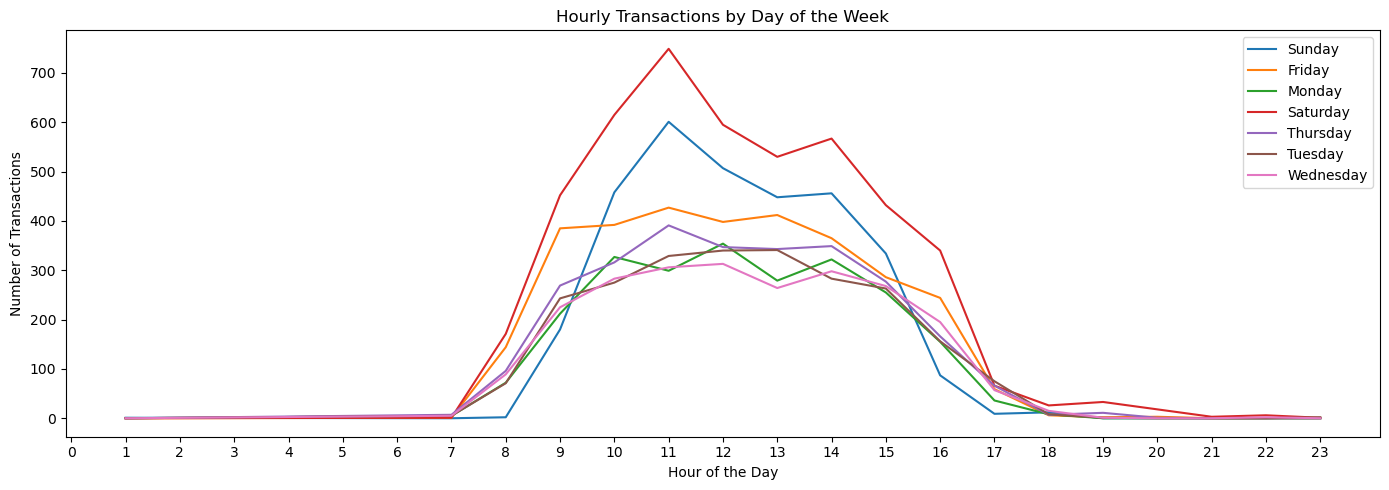

In [106]:
# 17
hourly_transactions = df.groupby(['day_name', 'hour']).size().unstack(fill_value=0)

ordered_days = ['Sunday','Friday','Monday',  'Saturday', 'Thursday', 'Tuesday', 'Wednesday', ]
hourly_transactions = hourly_transactions.reindex(ordered_days)

plt.figure(figsize=(14, 5))

for day in ordered_days:
    plt.plot(hourly_transactions.columns, hourly_transactions.loc[day], label=day)

plt.title('Hourly Transactions by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))
plt.legend(title='')
plt.tight_layout()
plt.show()

18. The daily sales trend plot reveals that _sales follow a distinct pattern depending on the day of the week, with notable peaks and dips at specific hours, reflecting customer behavior and possible business activity trends._

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

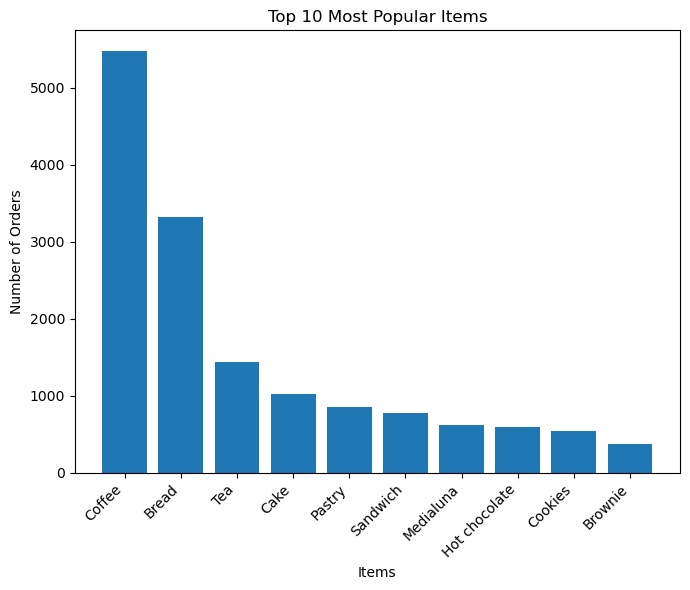

In [115]:
# 19
item_frequency = df.groupby('Item')['Transaction'].count().reset_index()
item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})
item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

plt.figure(figsize=(7, 6))
plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10))
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Popular Items')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14704\1181386230.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))


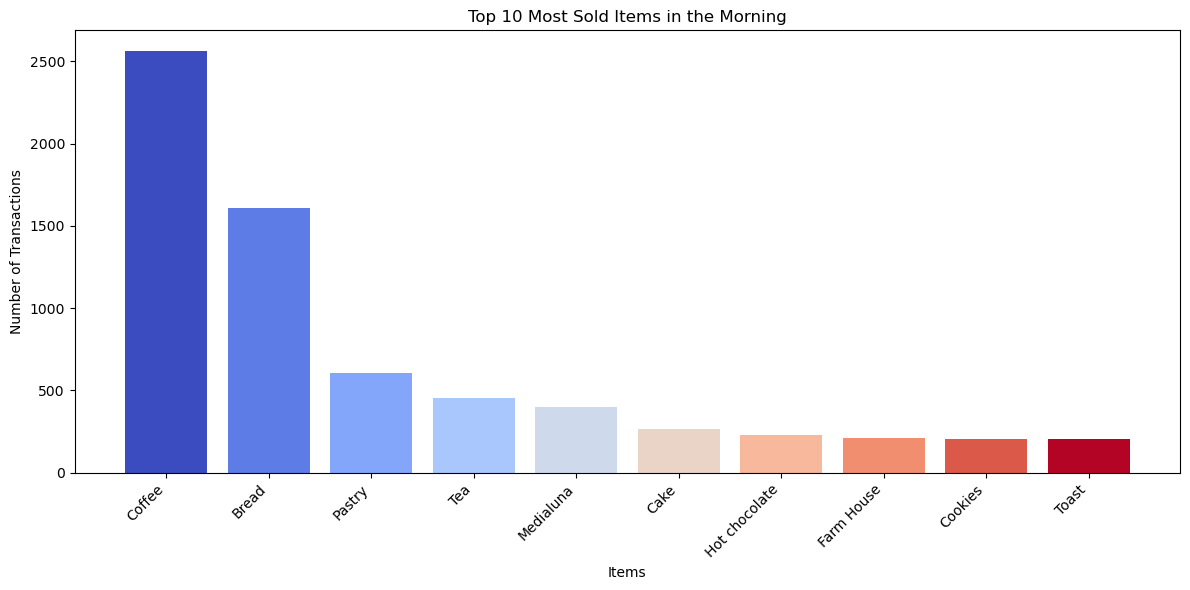

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14704\1181386230.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))


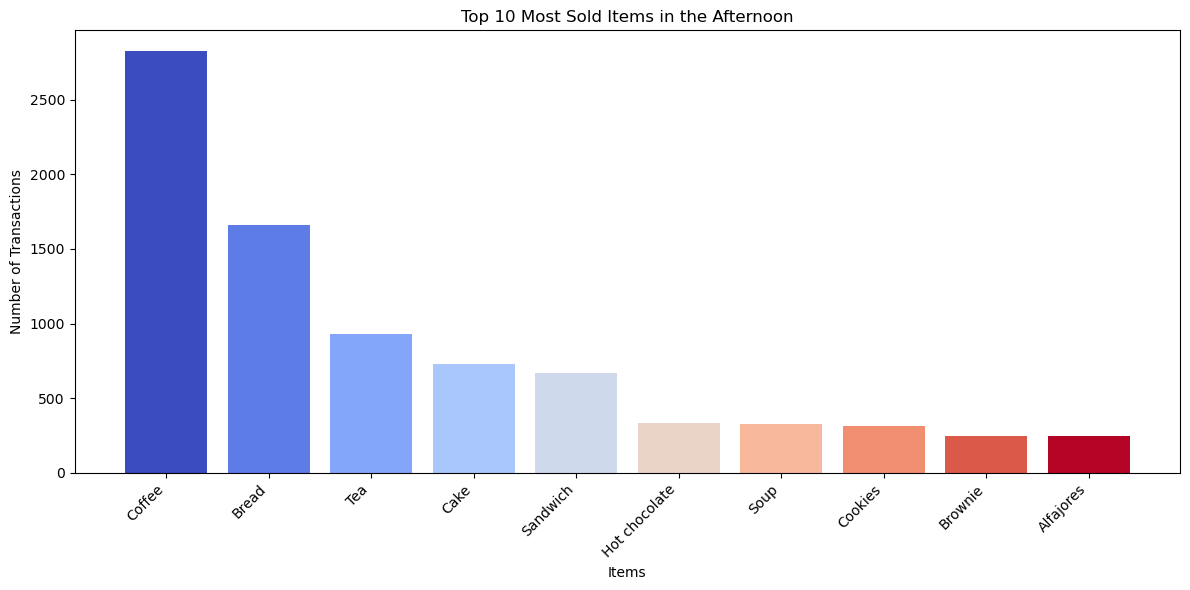

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14704\1181386230.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))


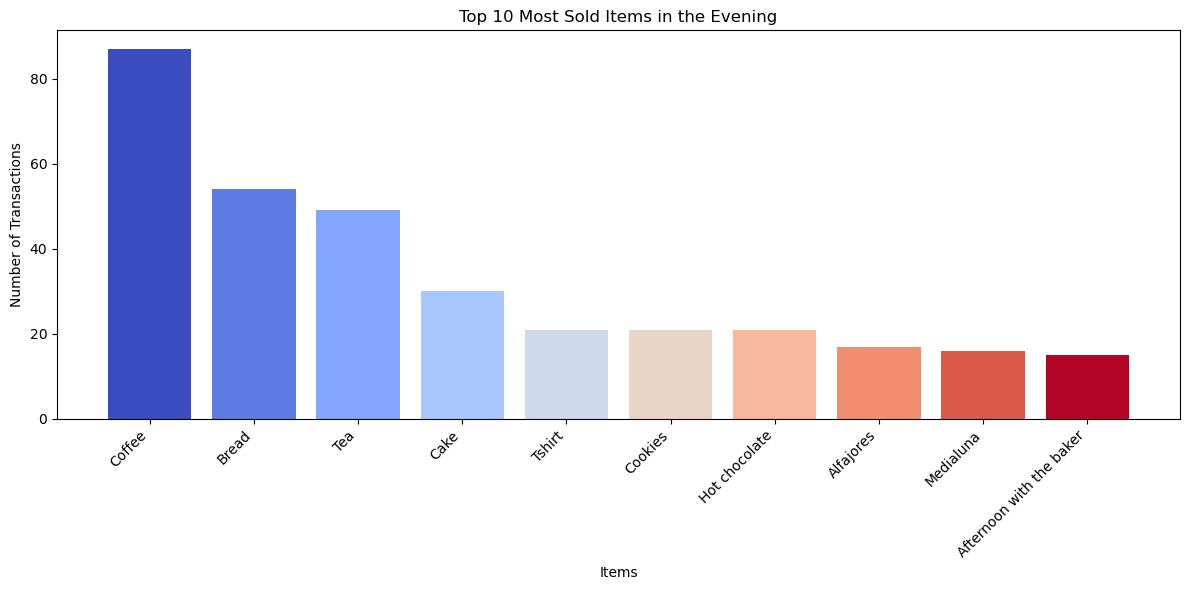

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14704\1181386230.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))


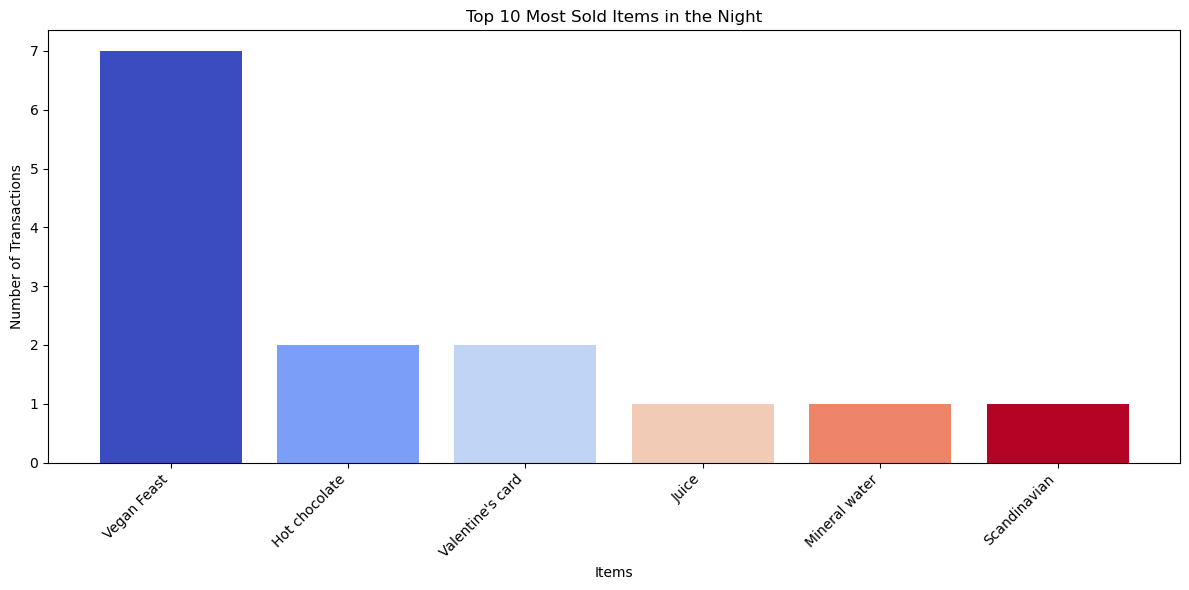

In [114]:
# 20
import matplotlib.cm as cm

def plot_top_items_by_period(period):
    period_data = df[df['period_day'] == period]
    
    item_frequency = period_data.groupby('Item')['Transaction'].count().reset_index()
    item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})
    item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)
    
    plt.figure(figsize=(12, 6)) 
    colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))  
    plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10), 
            color=[colors(i) for i in range(len(item_frequency.head(10)))])
    plt.xlabel('Items')
    plt.ylabel('Number of Transactions')
    plt.title(f'Top 10 Most Sold Items in the {period.capitalize()}')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()
    plt.show()
for period in df['period_day'].unique():
    plot_top_items_by_period(period)

21. It turns out that there is something different in the plot above, the insight is _that the most sold items vary depending on the time of day (period), highlighting different customer preferences or demand patterns during different parts of the day._

I found a valentine card, I was curious about when people bought it so I made a visualization of it

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14704\2893904441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentines_card_transactions['date'] = pd.to_datetime(valentines_card_transactions['date_time']).dt.date


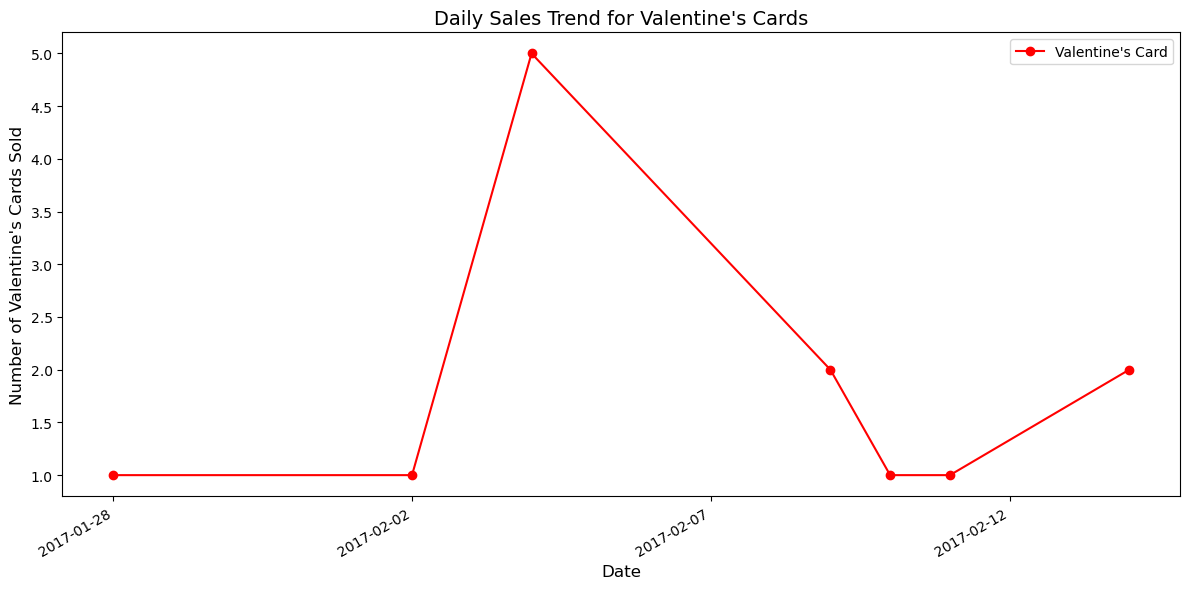

In [ ]:
#22
valentines_card_transactions = df[df['Item'].str.contains("Valentine's card", case=False, na=False)]
valentines_card_transactions['date'] = pd.to_datetime(valentines_card_transactions['date_time']).dt.date

valentines_sales_by_date = valentines_card_transactions.groupby('date').size()

plt.figure(figsize=(12, 6))
plt.plot(valentines_sales_by_date.index, valentines_sales_by_date.values, marker='o', color='red', label="Valentine's Card")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Adjust interval as needed
plt.gcf().autofmt_xdate()

plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Valentine\'s Cards Sold', fontsize=12)
plt.title('Daily Sales Trend for Valentine\'s Cards', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()


23. I found the insight from the sale of the Valentine's cards above is _a clear seasonal trend:

Peak Demand Near Valentine's Day:

The number of transactions significantly increases as Valentine's Day approaches (February 14).
This indicates that customers predominantly purchase Valentine's cards in the days leading up to the event, showcasing last-minute shopping behavior.
Decline After Valentine's Day:

Sales sharply drop immediately after February 14, confirming that demand for Valentine's cards is strictly seasonal and tied to the holiday.
Opportunity for Promotions:

Businesses could implement targeted promotions or special offers starting a week before Valentine's Day to maximize sales.
Bundling Valentine's cards with other popular items (e.g., flowers or chocolates) could encourage larger purchases._


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [127]:
# 24
df['Quantity'] = df.groupby(['Transaction', 'Item'])['Item'].transform('count')

df = df.drop_duplicates(subset=['Transaction', 'Item'])
transaction_data = df.pivot_table(index='Transaction', columns='Item', values='Quantity', aggfunc='sum').fillna(0)
display(transaction_data.head())

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
#25

# Convert quantities to 1 and 0
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)
display(transaction_data.head())

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [ ]:
# 26
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]
display(frequent_itemsets_df)

c:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [132]:
# 27
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
display(rules)

c:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
3,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
7,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:

Conclusion: The Impact of Data Analysis
As the day of analysis concludes, the findings derived from The Bread Basket dataset have revealed meaningful insights into customer behavior and sales patterns. Here are the key takeaways:

1. Time-Based Sales Trends
Certain items are more popular during specific periods of the day:
Morning: Coffee is the clear favorite, likely driven by customers starting their day.
Afternoon: Coffee continues to dominate, with a slight increase in sales compared to the morning.
Evening: Coffee remains popular but sees a significant drop, reflecting decreased activity at this time.
Night: Specialized items like the Vegan Feast become more prominent, although transaction volume is much lower.
2. Valentine's Card Purchasing Patterns
Concentrated Demand: Valentine's cards saw a significant increase in transactions leading up to February 14, illustrating the seasonal nature of this item.
Outliers: Minor purchases of Valentine's cards outside the typical season may indicate other uses, such as anniversaries or personal gifting.
3. Customer Preferences
Coffee is overwhelmingly the most purchased item across all periods, solidifying its role as a staple product.
Niche products (like the Vegan Feast) cater to specific customer segments, particularly during low-traffic periods.
4. Strategic Recommendations
Promotions: Focus promotions on Valentine's cards during early February to capture peak demand.
Inventory Management: Maintain high coffee stock levels, especially in the morning and afternoon.
Targeted Offers: Introduce tailored evening promotions to boost sales during quieter times.
